### import modules 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame, Series
from pandas.io.json import json_normalize
from influxdb import InfluxDBClient
from datetime import datetime, timedelta
import numpy as np 
import statistics
import pytz
plt.rcParams['figure.figsize'] = (15, 10)
plt.figure(dpi=450)
plt.style.use('ggplot')

<Figure size 6750x4500 with 0 Axes>

### Data import 

In [3]:
client = InfluxDBClient(host = '34.105.67.126', port = 8086, username = 'admin', password = 'BSSty1KTfj9MSSJy', database = 'muringato-stack',ssl = True)
query_str="select * from \"muringato-stack\" where \"device_id\" = \'mdot8\'"
result = client.query(query_str)
result_list = list(result.get_points())
df = pd.DataFrame(result_list)
df[['time']] = df[['time']].apply(pd.to_datetime)
#'consumed_airtime', 'channel_rssi', 
df2 = df.drop(['battery-voltage','height','channel_rssi','dev_eui','dev_addr','sensor','application_ids','uplink_token','frm_payload','frame_counter','received_at','port','ts','spreading_factor', 'coding_rate', 'frequency', 'gweui', 'bandwidth', 'uplink_token'], axis = 1)

C:\Users\user\Anaconda3\envs\usual\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host '34.105.67.126'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [4]:
df5 = df2.set_index('time')
df_zone = df5.tz_convert('Africa/Nairobi')

### Nyeri Hill 1  (-0.410225, 36.913601) - 1917m 

In [5]:
df_loc1 = df_zone['2022-05-22 09:30:00' : '2022-05-22 10:02:00']
df_tim1 = df_loc1.reset_index()
#df_tim.to_csv ('sample_dataset2.csv', header=True,index = False)

In [6]:
df_mul1 = df_tim1.loc[df_tim1['gateway_id'] == 'multitech-dsail-tower']
df_mul1 = df_mul1.set_index('time')
df_mul1= df_mul1.reset_index()
statistics.mean(df_mul1['rssi'])

-100.3913043478261

In [7]:
df_ker1 = df_tim1.loc[df_tim1['gateway_id'] == 'kerlink-dsail-tower']
df_ker1 = df_ker1.set_index('time')
df_ker1 = df_ker1.reset_index()
statistics.mean(df_ker1['rssi'])

-111.66666666666667

### Nyeri Hill 2  (-0.406542, 36.909702) - 1953m  

In [8]:
df_loc2 = df_zone['2022-05-22 10:12:00' : '2022-05-22 10:37:00']
df_tim2 = df_loc2.reset_index()

In [9]:
df_mul2 = df_tim2.loc[df_tim2['gateway_id'] == 'multitech-dsail-tower']
df_mul2 = df_mul2.set_index('time')
df_mul2= df_mul2.reset_index()
statistics.mean(df_mul2['rssi'])

-111.0

In [10]:
df_ker2 = df_tim2.loc[df_tim2['gateway_id'] == 'kerlink-dsail-tower']
df_ker2 = df_ker2.set_index('time')
df_ker2 = df_ker2.reset_index()
statistics.mean(df_ker2['rssi'])

-121.3125

### Nyeri Hill 3  (-0.404288, 36.904404) - 1941m  - mwenji

In [11]:
df_loc3 = df_zone['2022-05-22 10:39:00' : '2022-05-22 10:58:00']
df_tim3 = df_loc3.reset_index()

In [12]:
df_mul3 = df_tim3.loc[df_tim3['gateway_id'] == 'multitech-dsail-tower']
df_mul3 = df_mul3.set_index('time')
df_mul3 = df_mul3.reset_index()
statistics.mean(df_mul3['snr'])

-11.5

In [13]:
df_ker3 = df_tim3.loc[df_tim3['gateway_id'] == 'kerlink-dsail-tower']
df_ker3 = df_ker3.set_index('time')
df_ker3 = df_ker3.reset_index()
statistics.mean(df_ker3['rssi'])

-122.75

### Nyeri Hill 4  (-0.406380, 36.896317) - 1985m   - ihururu

In [14]:
df_loc4 = df_zone['2022-05-22 11:08:00' : '2022-05-22 11:35:00']
df_tim4 = df_loc4.reset_index()

In [15]:
df_mul4 = df_tim4.loc[df_tim4['gateway_id'] == 'multitech-dsail-tower']
df_mul4 = df_mul4.set_index('time')
df_mul4 = df_mul4.reset_index()
statistics.mean(df_mul4['rssi'])

-110.9

In [16]:
df_ker4 = df_tim4.loc[df_tim4['gateway_id'] == 'kerlink-dsail-tower']
df_ker4 = df_ker4.set_index('time')
df_ker4 = df_ker4.reset_index()
statistics.mean(df_ker4['rssi'])

-122.83333333333333

### Nyeri Hill 5 (-0.414681, 36.918831) - 1839m - mathari

In [17]:
df_loc5 = df_zone['2022-05-22 11:08:00' : '2022-05-22 11:35:00']
df_tim5 = df_loc5.reset_index()

In [18]:
df_mul5 = df_tim5.loc[df_tim5['gateway_id'] == 'multitech-dsail-tower']
df_mul5 = df_mul5.set_index('time')
df_mul5 = df_mul5.reset_index()
statistics.mean(df_mul5['rssi'])

-110.9

In [19]:
df_ker5 = df_tim5.loc[df_tim5['gateway_id'] == 'kerlink-dsail-tower']
df_ker5 = df_ker5.set_index('time')
df_ker5 = df_ker5.reset_index()
statistics.mean(df_ker5['rssi'])

-122.83333333333333

### Kiganjo Police (-0.390500, 37.002533) - 1737m  

In [20]:
df_loc6 = df_zone['2022-05-22 14:03:00' : '2022-05-22 14:38:00']
df_tim6 = df_loc6.reset_index()

In [21]:
df_mul6 = df_tim6.loc[df_tim6['gateway_id'] == 'multitech-dsail-tower']
df_mul6 = df_mul6.set_index('time')
df_mul6 = df_mul6.reset_index()
statistics.mean(df_mul6['rssi'])

-107.94285714285714

In [22]:
df_ker6 = df_tim6.loc[df_tim6['gateway_id'] == 'kerlink-dsail-tower']
df_ker6 = df_ker6.set_index('time')
df_ker6 = df_ker6.reset_index()
statistics.mean(df_ker6['rssi'])

-111.89473684210526

### Chaka - Nyaribo Junction (-0.350040, 37.000561) - 1758m  

In [23]:
df_loc7 = df_zone['2022-05-22 15:08:00' : '2022-05-22 15:42:00']
df_tim7 = df_loc7.reset_index()

In [24]:
df_mul7 = df_tim7.loc[df_tim7['gateway_id'] == 'multitech-dsail-tower']
df_mul7 = df_mul7.set_index('time')
df_mul7 = df_mul7.reset_index()
statistics.mean(df_mul7['rssi'])

-110.25714285714285

In [25]:
df_ker7 = df_tim7.loc[df_tim7['gateway_id'] == 'kerlink-dsail-tower']
df_ker7 = df_ker7.set_index('time')
df_ker7 = df_ker7.reset_index()
statistics.mean(df_ker7['rssi'])

-121.21428571428571

### Nyaribo Shopping centre (-0.376903, 36.983826) - 1761m   

In [26]:
df_loc8 = df_zone['2022-05-22 15:48:00' : '2022-05-22 16:23:00']
df_tim8 = df_loc8.reset_index()

In [27]:
df_mul8 = df_tim8.loc[df_tim8['gateway_id'] == 'multitech-dsail-tower']
df_mul8 = df_mul8.set_index('time')
df_mul8 = df_mul8.reset_index()
statistics.mean(df_mul8['rssi'])

-109.38461538461539

In [28]:
df_ker8 = df_tim8.loc[df_tim8['gateway_id'] == 'kerlink-dsail-tower']
df_ker8 = df_ker8.set_index('time')
df_ker8 = df_ker8.reset_index()
statistics.mean(df_ker8['rssi'])

-116.26666666666667

### King'ong'o - Almasi bottlers (-0.414613, 36.957924) - 1788m 

In [29]:
df_loc9 = df_zone['2022-05-22 17:28:00' : '2022-05-22 18:05:00']
df_tim9 = df_loc9.reset_index()

In [30]:
df_mul9 = df_tim9.loc[df_tim9['gateway_id'] == 'multitech-dsail-tower']
df_mul9 = df_mul9.set_index('time')
df_mul9 = df_mul9.reset_index()
statistics.mean(df_mul9['rssi'])

-108.18181818181819

In [31]:
df_ker9 = df_tim9.loc[df_tim9['gateway_id'] == 'kerlink-dsail-tower']
df_ker9 = df_ker9.set_index('time')
df_ker9 = df_ker9.reset_index()
statistics.mean(df_ker9['rssi'])

-120.56

### Muringato-1k  (-0.406104, 36.948135) - 1734m  

In [32]:
df_loc10 = df_zone['2022-05-22 22:40:00' : '2022-05-22 23:12:00']
df_tim10 = df_loc10.reset_index()

In [33]:
df_mul10 = df_tim10.loc[df_tim10['gateway_id'] == 'multitech-dsail-tower']
df_mul10 = df_mul10.set_index('time')
df_mul10 = df_mul10.reset_index()
statistics.mean(df_mul10['rssi'])

-104.47457627118644

In [34]:
df_ker10 = df_tim10.loc[df_tim10['gateway_id'] == 'kerlink-dsail-tower']
df_ker10 = df_ker10.set_index('time')
df_ker10 = df_ker10.reset_index()
statistics.mean(df_ker10['rssi'])

-120.56666666666666

### Conservancy Junction  (-0.389861, 36.956863) - 1768m   

In [35]:
df_loc11 = df_zone['2022-05-29 08:30:00' : '2022-05-29 09:02:00']
df_tim11 = df_loc11.reset_index()

In [36]:
df_mul11 = df_tim11.loc[df_tim11['gateway_id'] == 'multitech-dsail-tower']
df_mul11 = df_mul11.set_index('time')
df_mul11 = df_mul11.reset_index()
statistics.mean(df_mul11['rssi'])

-95.625

In [37]:
df_ker11 = df_tim11.loc[df_tim11['gateway_id'] == 'kerlink-dsail-tower']
df_ker11 = df_ker11.set_index('time')
df_ker11 = df_ker11.reset_index()
statistics.mean(df_ker11['rssi'])

-114.42553191489361

### Embassy-Golden gates   (-0.371265, 36.930866) - 1856m    

In [38]:
df_loc12 = df_zone['2022-05-29 09:30:00' : '2022-05-29 10:05:00']
df_tim12 = df_loc12.reset_index()

In [39]:
df_mul12 = df_tim12.loc[df_tim12['gateway_id'] == 'multitech-dsail-tower']
df_mul12 = df_mul12.set_index('time')
df_mul12 = df_mul12.reset_index()
statistics.mean(df_mul12['rssi'])

-110.07407407407408

In [40]:
df_ker12 = df_tim12.loc[df_tim12['gateway_id'] == 'kerlink-dsail-tower']
df_ker12 = df_ker12.set_index('time')
df_ker12 = df_ker12.reset_index()
statistics.mean(df_ker12['rssi'])

-121.95

### Muringato-Bridge-Main Road  (-0.402339, 36.945244) - 1729m

In [41]:
df_loc13 = df_zone['2022-05-29 10:45:00' : '2022-05-29 11:15:00']
df_tim13 = df_loc13.reset_index()

In [42]:
df_mul13 = df_tim13.loc[df_tim13['gateway_id'] == 'multitech-dsail-tower']
df_mul13 = df_mul13.set_index('time')
df_mul13 = df_mul13.reset_index()
statistics.mean(df_mul13['rssi'])

-104.72527472527473

In [43]:
df_ker13 = df_tim13.loc[df_tim13['gateway_id'] == 'kerlink-dsail-tower']
df_ker13 = df_ker13.set_index('time')
df_ker13 = df_ker13.reset_index()
statistics.mean(df_ker13['rssi'])

-122.77777777777777

### King'ong'o Shell (-0.410647, 36.948380) - 1787m

In [44]:
df_loc14 = df_zone['2022-05-29 11:40:00' : '2022-05-29 12:30:00']
df_tim14 = df_loc14.reset_index()

In [45]:
df_mul14 = df_tim14.loc[df_tim14['gateway_id'] == 'multitech-dsail-tower']
df_mul14 = df_mul14.set_index('time')
df_mul14 = df_mul14.reset_index() 
statistics.mean(df_mul14['rssi'])

-107.72

In [46]:
df_ker14 = df_tim14.loc[df_tim14['gateway_id'] == 'kerlink-dsail-tower']
df_ker14 = df_ker14.set_index('time')
df_ker14 = df_ker14.reset_index()
statistics.mean(df_ker14['rssi'])

-121.03571428571429

### Maumau-Road-Muringato bridge (-0.398831, 36.892372) - 1900m 

In [47]:
df_loc15 = df_zone['2022-05-29 12:50:00' : '2022-05-29 13:40:00']
df_tim15 = df_loc15.reset_index()

In [48]:
df_mul15 = df_tim15.loc[df_tim15['gateway_id'] == 'multitech-dsail-tower']
df_mul15 = df_mul15.set_index('time')
df_mul15 = df_mul15.reset_index() 


In [49]:
df_ker15 = df_tim15.loc[df_tim15['gateway_id'] == 'kerlink-dsail-tower']
df_ker15 = df_ker15.set_index('time')
df_ker15 = df_ker15.reset_index()
statistics.mean(df_ker15['rssi'])

-122.63636363636364

### Muringato bridge -Kamwenja Road (-0.392760, 36.908562) - 1829m

In [50]:
df_loc16 = df_zone['2022-05-29 13:45:00' : '2022-05-29 14:20:00']
df_tim16 = df_loc16.reset_index()

In [51]:
df_mul16 = df_tim16.loc[df_tim16['gateway_id'] == 'multitech-dsail-tower']
df_mul16 = df_mul16.set_index('time')
df_mul16 = df_mul16.reset_index() 

In [52]:
df_ker16 = df_tim16.loc[df_tim16['gateway_id'] == 'kerlink-dsail-tower']
df_ker16 = df_ker16.set_index('time')
df_ker16 = df_ker16.reset_index()
statistics.mean(df_ker16['rssi'])

-124.0

### King'ong'o - Gamerock  (-0.412615, 36.979656) - 1746m 

In [53]:
df_loc17 = df_zone['2022-05-29 14:45:00' : '2022-05-29 15:07:00']
df_tim17 = df_loc17.reset_index()

In [54]:
df_mul17 = df_tim17.loc[df_tim17['gateway_id'] == 'multitech-dsail-tower']
df_mul17 = df_mul17.set_index('time')
df_mul17 = df_mul17.reset_index() 
statistics.mean(df_mul17['rssi'])

-105.85185185185185

In [55]:
df_ker17 = df_tim17.loc[df_tim17['gateway_id'] == 'kerlink-dsail-tower']
df_ker17 = df_ker17.set_index('time')
df_ker17 = df_ker17.reset_index()
statistics.mean(df_ker17['rssi'])

-107.7457627118644

### Nyeri - Town  (-0.421388, 36.950909) - 1759m  

In [56]:
df_loc18 = df_zone['2022-05-29 15:08:00' : '2022-05-29 17:07:00']
df_tim18 = df_loc18.reset_index()

In [57]:
df_mul18 = df_tim18.loc[df_tim18['gateway_id'] == 'multitech-dsail-tower']
df_mul18 = df_mul18.set_index('time')
df_mul18 = df_mul18.reset_index()

In [58]:
df_ker18 = df_tim18.loc[df_tim18['gateway_id'] == 'kerlink-dsail-tower']
df_ker18 = df_ker18.set_index('time')
df_ker18 = df_ker18.reset_index()


## sensor location  

In [59]:
client = InfluxDBClient(host = '34.105.67.126', port = 8086, username = 'admin', password = 'BSSty1KTfj9MSSJy', database = 'muringato-stack',ssl = True)
query_str="select * from \"muringato-stack\" where \"device_id\" = \'mdot6\'"
result = client.query(query_str)
result_list = list(result.get_points())
dfs = pd.DataFrame(result_list)
dfs[['time']] = dfs[['time']].apply(pd.to_datetime)
#'consumed_airtime', 'channel_rssi', 
dfse = dfs.drop(['battery-voltage','height','channel_rssi','dev_eui','dev_addr','sensor','application_ids','uplink_token','frm_payload','frame_counter','received_at','port','ts','spreading_factor', 'coding_rate', 'frequency', 'gweui', 'bandwidth', 'uplink_token'], axis = 1)

C:\Users\user\Anaconda3\envs\usual\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host '34.105.67.126'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


### Sensor Location 

In [60]:
df_ser = dfse.set_index('time')
df_zone2 = df_ser.tz_convert('Africa/Nairobi')

In [61]:
df_locse = df_zone2['2022-05-22 08:30:00' : '2022-05-22 17:02:00']
df_timse = df_locse.reset_index()
#df_tim.to_csv ('sample_dataset2.csv', header=True,index = False)

In [62]:
df_mul19 = df_timse.loc[df_timse['gateway_id'] == 'multitech-dsail-tower']
df_mul19 = df_mul19.set_index('time')
df_mul19 = df_mul19.reset_index()
statistics.mean(df_mul19['rssi'])

-101.27868852459017

In [63]:
df_ker19 = df_timse.loc[df_timse['gateway_id'] == 'kerlink-dsail-tower']
df_ker19 = df_ker19.set_index('time')
df_ker19 = df_ker19.reset_index()
statistics.mean(df_ker19['rssi'])

-107.15789473684211

In [72]:

plt.rcParams['figure.figsize'] = (13, 7)
plt.figure(dpi=450)
plt.style.use('ggplot')
data_1 = df_mul19['rssi'] # 0.9km
data_2 = df_mul11['rssi'] # 1km
data_3 = df_mul10['rssi'] # 1.6km
data_4 = df_mul13['rssi'] # 1.71km 
data_5 = df_mul9['rssi'] # 1.81km 
data_6 = df_mul14['rssi'] # 1.9km
data_7 = df_mul8['rssi'] # 3.6km
data_8 = df_mul12['rssi'] # 4.5km
data_9 = df_mul2['rssi'] # 5.7km
data_10 = df_mul3['rssi'] # 6.2km
data = [data_1,data_2, data_3, data_4,  data_5, data_6, data_7, data_8,  data_9, data_10]
ticks = ['0.9', '1', '1.6','1.71','1.81', '1.9', '3.6', '4.5', '5.7', '6.2']
lab = [1,2,3,4,5,6,7,8,9,10]
ticks2 = dict(zip(ticks,lab))


<Figure size 5850x3150 with 0 Axes>

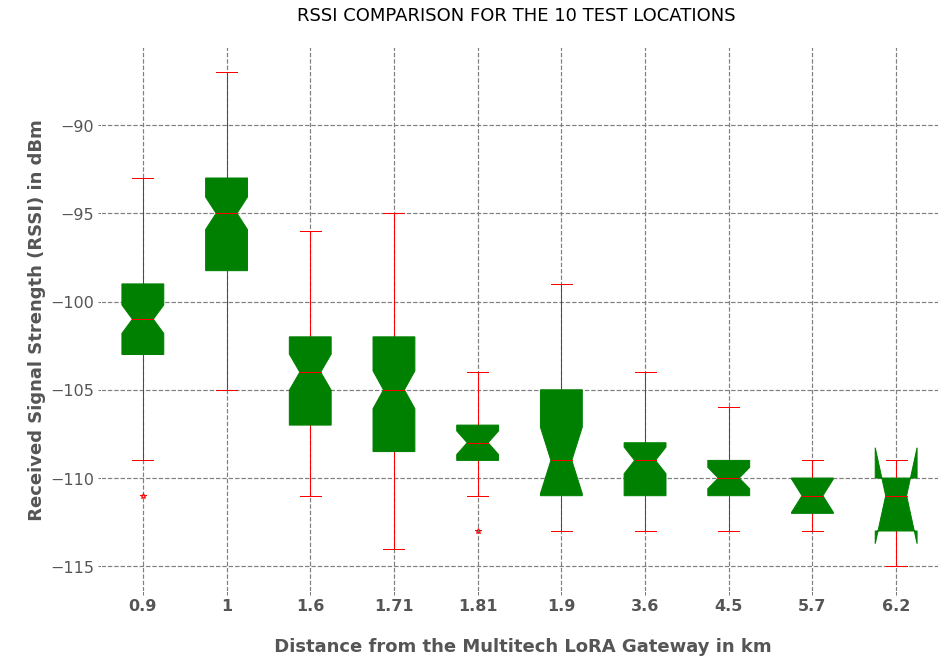

In [73]:
plt.rcParams['figure.figsize'] = (15, 10)
fig, ax = plt.subplots(1,1)
c = "green"
fig.patch.set_facecolor('white')
ax.boxplot(data,sym='*', patch_artist=True, notch='True',vert=True, 
           boxprops=dict(facecolor=c, color=c), medianprops=dict(color="red"), whiskerprops=dict(color="red"),
           capprops=dict(color="red"),flierprops=dict(color="red", markeredgecolor="red"))
ax.grid(color = 'gray', linestyle = '--', linewidth = 1.2)
ax.set_title('RSSI COMPARISON FOR THE 10 TEST LOCATIONS \n', fontsize=18)
ax.set_xlabel('\n Distance from the Multitech LoRA Gateway in km', fontsize=18, weight='bold')
ax.set_ylabel(' \n Received Signal Strength (RSSI) in dBm ', fontsize=18, weight='bold')
#ax.set_xticklabels([1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10], ticks)
ax.set_xticklabels(ticks2, weight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)
ax.set(facecolor = "white")
ax.grid(True)

plt.savefig('multitech_rssi.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

In [74]:
dat_1 = df_ker19['rssi']
dat_2 = df_ker11['rssi']
dat_3 = df_ker10['rssi']
dat_4 = df_ker13['rssi']
dat_5 = df_ker9['rssi']
dat_6 = df_ker14['rssi']
dat_7 = df_ker8['rssi']
dat_8 = df_ker12['rssi']
dat_9 = df_ker2['rssi']
dat_10 = df_ker3['rssi']
dat = [dat_1, dat_2, dat_3, dat_4,  dat_5, dat_6, dat_7, dat_8,  dat_9, dat_10]

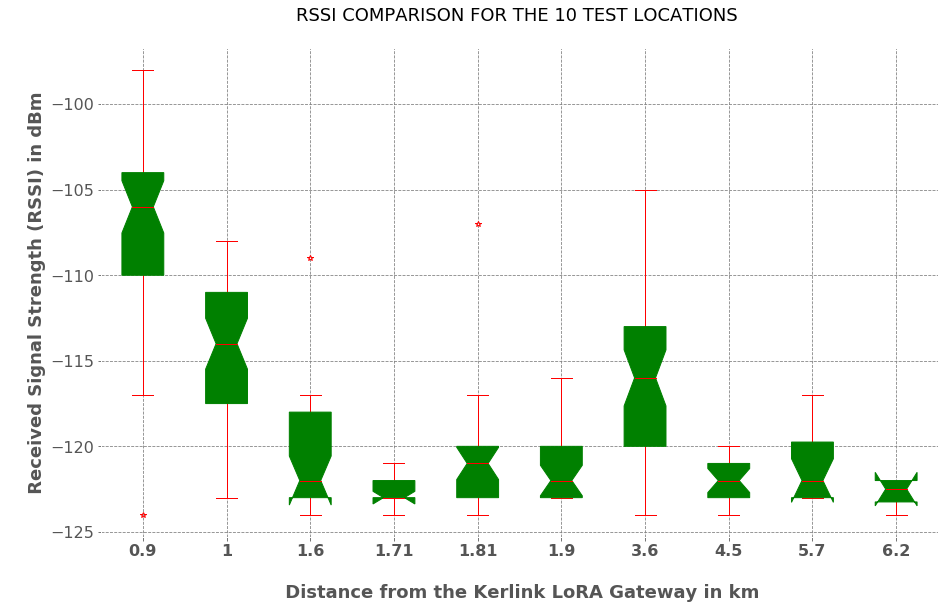

In [75]:
plt.rcParams['figure.figsize'] = (15, 9)
fig, ax = plt.subplots(1,1)
c = "green"
fig.patch.set_facecolor('white')
ax.boxplot(dat,sym='*', patch_artist=True, notch='True',vert=True, 
           boxprops=dict(facecolor=c, color=c), medianprops=dict(color="red"), whiskerprops=dict(color="red"),
           capprops=dict(color="red"),flierprops=dict(color="red", markeredgecolor="red"))
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_title('RSSI COMPARISON FOR THE 10 TEST LOCATIONS \n', fontsize=18)
ax.set_xlabel('\n Distance from the Kerlink LoRA Gateway in km', fontsize=18, weight='bold')
ax.set_ylabel(' \n Received Signal Strength (RSSI) in dBm ', fontsize=18, weight='bold')
#ax.set_xticklabels([1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10], ticks)
ax.set_xticklabels(ticks2, weight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)
ax.set(facecolor = "white")
ax.grid(True)

plt.savefig('kerlink_snr.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()